In [184]:
import pandas as pd
import numpy as np

In [185]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

print(train_data.shape, test_data.shape)

(891, 12) (418, 11)


In [186]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [187]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
train_label = train_data['Survived']
train_data = train_data[['Pclass', 'Sex', 'Age', 'Fare']]
train_data.head()
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

从train_data中将'Survived'分离出来作为label(y)，将'Pclass', 'Sex', 'Age', 'Fare'分离出来作为输入(X)

In [190]:
for feature in ['Pclass', 'Sex', 'Age', 'Fare']:
    print(np.any(pd.isna(test_data[feature])))

False
False
True
True


Age中包括有空缺数据

In [191]:
train_data.Sex.replace("male", 0, inplace=True)
train_data.Sex.replace("female", 1, inplace=True)
test_data.Sex.replace("male", 0, inplace=True)
test_data.Sex.replace("female", 1, inplace=True)
train_data.Sex.head()


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [192]:
sex_value_cnt = train_data.Sex.value_counts()
male_num, female_num = sex_value_cnt[0], sex_value_cnt[1]
age_male_sum = train_data[train_data['Sex']==0]['Age'].sum()
age_female_sum = train_data[train_data['Sex']==1]['Age'].sum()

age_male_aver = age_male_sum / male_num
age_female_aver = age_female_sum / female_num

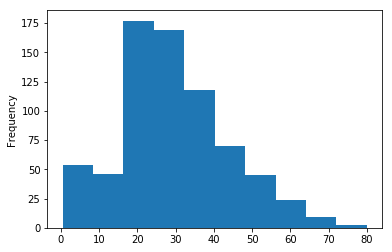

In [193]:
import matplotlib

train_data.Age.plot.hist()

In [194]:
train_data[train_data['Sex']==0]["Age"].isna().sum()

age_na_index = train_data[train_data['Age'].isna()].index.tolist()

待解决问题，如何直接用pandas内置函数将Age中的NaN根据不同的Sex值填充，直接对切片进行操作会导致train_data本身的值不发生变化

In [195]:
age_list = []
for i in range(train_data.shape[0]):
    if i in age_na_index:
        if train_data.iloc[i]['Sex'] == 1:
            age_list.append(age_female_aver)
        else:
            age_list.append(age_male_aver)
    else:
        age_list.append(train_data.iloc[i]['Age'])

age_series = pd.Series(age_list)
train_data['Age'] = age_series
train_data[train_data['Sex']==0]["Age"].isna().sum()
train_data.head

<bound method NDFrame.head of      Pclass  Sex        Age      Fare
0         3    0  22.000000    7.2500
1         1    1  38.000000   71.2833
2         3    1  26.000000    7.9250
3         1    1  35.000000   53.1000
4         3    0  35.000000    8.0500
5         3    0  24.123345    8.4583
6         1    0  54.000000   51.8625
7         3    0   2.000000   21.0750
8         3    1  27.000000   11.1333
9         2    1  14.000000   30.0708
10        3    1   4.000000   16.7000
11        1    1  58.000000   26.5500
12        3    0  20.000000    8.0500
13        3    0  39.000000   31.2750
14        3    1  14.000000    7.8542
15        2    1  55.000000   16.0000
16        3    0   2.000000   29.1250
17        2    0  24.123345   13.0000
18        3    1  31.000000   18.0000
19        3    1  23.203822    7.2250
20        2    0  35.000000   26.0000
21        2    0  34.000000   13.0000
22        3    1  15.000000    8.0292
23        1    0  28.000000   35.5000
24        3    1   8

In [196]:
age_max, age_min, fare_max, fare_min = train_data['Age'].max(), train_data['Age'].min(), train_data['Fare'].max(), train_data['Fare'].min()

age_bin = np.arange(int(age_min), age_max, step= 10).tolist()
fare_bin = np.concatenate((np.arange(fare_min, 200, step=20),
                           np.arange(200, fare_max, step=100)),axis=0).tolist()

train_data['Age'] = pd.cut(train_data['Age'], age_bin, labels=False)
train_data['Fare'] = pd.cut(train_data['Fare'], fare_bin, labels=False)
train_data.to_csv("../data/processed_train_data.csv", index=False)